In [143]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
import seaborn as sns
from sklearn.decomposition import PCA

In [81]:
train = pd.read_csv('wells_fargo_train.csv', index_col = ['Id'])

In [52]:
train.head()
#1-label, 2-one hot, 3-one hot, 4-label, 5-one hot, 6-

,Fiscal Year,Term Type,Career,Program Level,Study Year,Campus_Id,Faculty Group,Program Grouping,Coop Regular,WorkTerm,Attendance,Visa Status,Gender,Unique Headcount
Id,,,,,,,,,,,,,,
0,2008/09,Fall term,Graduate,Doctoral,D,4,AHS,"Aging, Health and Well-Being",Regular,Academic Term,Full-Time,Canadian,Male,5
1,2008/09,Fall term,Graduate,Doctoral,D,4,AHS,"Aging, Health and Well-Being",Regular,Academic Term,Full-Time,Canadian,Female,7
2,2008/09,Fall term,Graduate,Doctoral,D,4,AHS,"Aging, Health and Well-Being",Regular,Academic Term,Full-Time,International,Female,1
3,2008/09,Fall term,Graduate,Doctoral,D,4,AHS,Health Studies and Gerontology,Regular,Academic Term,Full-Time,Canadian,Male,3
4,2008/09,Fall term,Graduate,Doctoral,D,4,AHS,Health Studies and Gerontology,Regular,Academic Term,Full-Time,Canadian,Female,11


In [53]:
dict = ['Fiscal Year','Term Type','Career','Program Level','Study Year','Campus_Id','Faculty Group','Program Grouping',
        'Coop Regular','WorkTerm','Attendance','Visa Status','Gender','Unique Headcount']
for i in range(14):
    print(train[dict[i]].value_counts())

2013/14    10838
2014/15    10804
2012/13    10719
2011/12    10574
2010/11    10278
2009/10     9787
2008/09     9249
Name: Fiscal Year, dtype: int64
Winter term    25187
Fall term      25153
Spring term    21909
Name: Term Type, dtype: int64
Undergraduate    58611
Graduate         13638
Name: Career, dtype: int64
Bachelors     56905
Masters        7328
Doctoral       5783
Non-Degree     2102
Qualifying      131
Name: Program Level, dtype: int64
3    16688
4    16566
2    15693
1     7751
M     7687
D     5423
N     2238
5      203
Name: Study Year, dtype: int64
4    64421
2     5731
1     1744
3      263
0       90
Name: Campus_Id, dtype: int64
ARTS    19499
MATH    18119
ENG     11277
SCI     11152
ENV      6056
AHS      4666
SE        610
CFM       586
REN       149
THL       135
Name: Faculty Group, dtype: int64
Computer Science            2737
Mathematics                 2340
Actuarial Science           1933
Psychology                  1928
Arts                        1829
      

In [173]:
# One hot encoding for column [['Term Type', 'Faculty Group', 'Visa Status']]
X=train[['Term Type', 'Faculty Group', 'Visa Status', 'Program Grouping']].copy()

df_OneHotEn = X

for col in X.columns:
    
    # reshape the 1-D col array to 2-D as fit_transform expects 2-D and finally fit the object 
    Y = onehotencoder.fit_transform(X[col].values.reshape(-1,1)).toarray()
    
    # To add this back into the original dataframe 
    dfOneHot = pd.DataFrame(Y, columns = [("%s_"%col +str(int(i))) for i in range(len(X[col].unique()))]) 
    df1 = pd.concat([df_OneHotEn, dfOneHot], axis=1)
    
    # dropping the country column 
    df_OneHotEn= df1.drop([col], axis=1) 

print(df_OneHotEn.columns)    

Index(['Term Type_0', 'Term Type_1', 'Term Type_2', 'Faculty Group_0',
       'Faculty Group_1', 'Faculty Group_2', 'Faculty Group_3',
       'Faculty Group_4', 'Faculty Group_5', 'Faculty Group_6',
       ...
       'Program Grouping_137', 'Program Grouping_138', 'Program Grouping_139',
       'Program Grouping_140', 'Program Grouping_141', 'Program Grouping_142',
       'Program Grouping_143', 'Program Grouping_144', 'Program Grouping_145',
       'Program Grouping_146'],
      dtype='object', length=163)


In [174]:
df_OneHotEn = df_OneHotEn.drop(['Term Type_0', 'Faculty Group_0', 'Visa Status_0', 'Program Grouping_0'], axis=1)
# dropped first category of each column to break the symmetry

In [175]:
df_OneHotEn

,Term Type_1,Term Type_2,Faculty Group_1,Faculty Group_2,Faculty Group_3,Faculty Group_4,Faculty Group_5,Faculty Group_6,Faculty Group_7,Faculty Group_8,...,Program Grouping_137,Program Grouping_138,Program Grouping_139,Program Grouping_140,Program Grouping_141,Program Grouping_142,Program Grouping_143,Program Grouping_144,Program Grouping_145,Program Grouping_146
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72244,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72245,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72246,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
# Label encoding in alphabetical order for column ['Fiscal Year', 'Coop Regular', 'WorkTerm', 'Gender']
Z= train[['Fiscal Year',  'Coop Regular', 'WorkTerm', 'Gender']].copy()

df_label_encode = Z.apply(le.fit_transform)
  

In [177]:
df_label_encode

,Fiscal Year,Coop Regular,WorkTerm,Gender
Id,,,,
0,0,1,0,2
1,0,1,0,1
2,0,1,0,1
3,0,1,0,2
4,0,1,0,1
...,...,...,...,...
72244,6,1,0,2
72245,6,1,0,1
72246,6,1,0,1


In [178]:
# Label encoding not in alphabetical order ['Career', 'Program Level', 'Study Year', 'Attendance' ]

encode = {"Career":     {"Undergraduate" : 0, "Graduate":1},
       "Program Level": {"Bachelors": 2, "Masters": 3, "Doctoral": 4, "Non-Degree": 1, "Qualifying": 0},
         "Study Year": {"M":6, "D": 7, "N":0},
         "Attendance": {"Full-Time":1 , "Part-Time": 2,"Unknown Attendance": 0}}

# replacing the above encoded column
train_df = train.replace(encode)
train_df.head()

,Fiscal Year,Term Type,Career,Program Level,Study Year,Campus_Id,Faculty Group,Program Grouping,Coop Regular,WorkTerm,Attendance,Visa Status,Gender,Unique Headcount
Id,,,,,,,,,,,,,,
0,2008/09,Fall term,1,4,7,4,AHS,"Aging, Health and Well-Being",Regular,Academic Term,1,Canadian,Male,5
1,2008/09,Fall term,1,4,7,4,AHS,"Aging, Health and Well-Being",Regular,Academic Term,1,Canadian,Female,7
2,2008/09,Fall term,1,4,7,4,AHS,"Aging, Health and Well-Being",Regular,Academic Term,1,International,Female,1
3,2008/09,Fall term,1,4,7,4,AHS,Health Studies and Gerontology,Regular,Academic Term,1,Canadian,Male,3
4,2008/09,Fall term,1,4,7,4,AHS,Health Studies and Gerontology,Regular,Academic Term,1,Canadian,Female,11


In [179]:
train_df = train_df.drop(['Fiscal Year', 'Coop Regular', 'WorkTerm', 'Gender', 'Term Type', 'Faculty Group', 'Visa Status', 'Program Grouping'], axis=1)

In [180]:
# concatenating all the encoded dataframes 
train_df = pd.concat([df_label_encode, df_OneHotEn, train_df ], axis=1)
train_df

,Fiscal Year,Coop Regular,WorkTerm,Gender,Term Type_1,Term Type_2,Faculty Group_1,Faculty Group_2,Faculty Group_3,Faculty Group_4,...,Program Grouping_143,Program Grouping_144,Program Grouping_145,Program Grouping_146,Career,Program Level,Study Year,Campus_Id,Attendance,Unique Headcount
0,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,4,7,4,1,5
1,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,4,7,4,1,7
2,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,4,7,4,1,1
3,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,4,7,4,1,3
4,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,4,7,4,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72244,6,1,0,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,4,2,25
72245,6,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,4,2,27
72246,6,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,4,2,1
72247,6,1,0,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,4,2,30


In [181]:
!pip install statsmodels

In [182]:
import statsmodels.api as sm

def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]

        r_squared = sm.OLS(y,x).fit().rsquared
        print("r_sq",r_squared)
        if 1!=r_squared:
            vif = round(1/(1-r_squared),2)
            vif_df.loc[i] = [x_var_names[i], vif]
        else: 
            print("inf",x_var_names[i])
            vif = "inf"
            vif_df.loc[i] = [x_var_names[i], vif]
            
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

res = calculate_vif(train_df[['Program Level', 'Career']])

r_sq 0.39124012310482914
r_sq 0.3912401231048295


In [183]:
print(res)

             Var   Vif
0  Program Level  1.64
1         Career  1.64


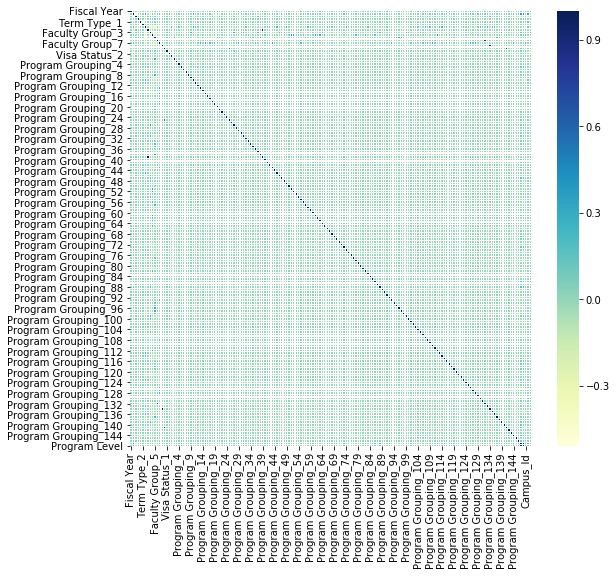

In [159]:
corrmat = train_df.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [184]:
train_df = train_df.drop(['Program Level'], axis=1)

In [185]:
y= train_df['Unique Headcount'].copy()
y

0         5
1         7
2         1
3         3
4        11
         ..
72244    25
72245    27
72246     1
72247    30
72248    18
Name: Unique Headcount, Length: 72249, dtype: int64

In [186]:
x= train_df.drop(['Unique Headcount'], axis=1)
x

,Fiscal Year,Coop Regular,WorkTerm,Gender,Term Type_1,Term Type_2,Faculty Group_1,Faculty Group_2,Faculty Group_3,Faculty Group_4,...,Program Grouping_141,Program Grouping_142,Program Grouping_143,Program Grouping_144,Program Grouping_145,Program Grouping_146,Career,Study Year,Campus_Id,Attendance
0,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,7,4,1
1,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,7,4,1
2,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,7,4,1
3,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,7,4,1
4,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,7,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72244,6,1,0,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4,2
72245,6,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4,2
72246,6,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4,2
72247,6,1,0,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4,2


In [187]:
pca = PCA(n_components=30)

X_train_pca = pca.fit_transform(x)
X_train_pca.shape

(72249, 30)

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [190]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y, test_size=0.2, random_state=42)

In [192]:
X_train, y_train = make_regression(n_features=30, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
regr.predict(X_test)


C:\Users\shrut\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([84.40388489, 21.03954723, -2.81401372, ..., 31.52639881,
       75.2181616 , 75.2181616 ])